# 輸入套件

In [115]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [116]:
# 畫圖時不需要對圖形輸入 .show()
%matplotlib inline

# 輸入資料

In [117]:
train = pd.read_csv('C:/Users/User/kaggle/Bike Sharing Demand/train.csv')
test = pd.read_csv('C:/Users/User/kaggle/Bike Sharing Demand/test.csv')
sumbit = pd.read_csv('C:/Users/User/kaggle/Bike Sharing Demand/sampleSubmission.csv')

# 處理遺失值

- season     分為春夏秋冬四季
- weather    好壞分成四種等級，1是最好 4是最差
- temp       溫度
- casual     臨時來的租借者
- registered 已經註冊的租借者
- count      租借者總計

In [118]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [119]:
#沒有遺失值，但還是要保持疑慮，有可能是資料來源用不好的方法填補過遺失值
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 變數count
1. 50th percentile :145
2. 75th percentile :284
3. max值 : 977

- 以上資訊代表可能有 outlier

In [120]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [121]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


# Feature Engineering

In [122]:
# 使用平均值減掉或加上3倍標準差的分法判定outlier   (--可以再調整--)
print(f'Shape of the before outliers: {train.shape}')

train = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]
print(f'Shape of the before outliers: {train.shape}')

Shape of the before outliers: (10886, 12)
Shape of the before outliers: (10739, 12)


## 資料前處理

In [123]:
data = train.append(test)                  # train 與 test 結合

# train與test有各自的index，要把index整合
data.reset_index(inplace = True)           # reset_index 會把原本的index變成一個欄位塞到資料集裡
data.drop('index',inplace = True,axis = 1) # 把舊的index .drop掉

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [124]:
# model 沒辦法直接接收時間格式的欄位
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

## 繪圖

- windspeed的圖有異常，windspeed應該是一個連續數值的欄位，以下有幾種可能
1. 10以下的數值可能儀器偵測不到就列為0
2. 10以上的部分，儀器的測量可能相當不穩定，或者是儀器的毀損，會導致數值都是 0

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

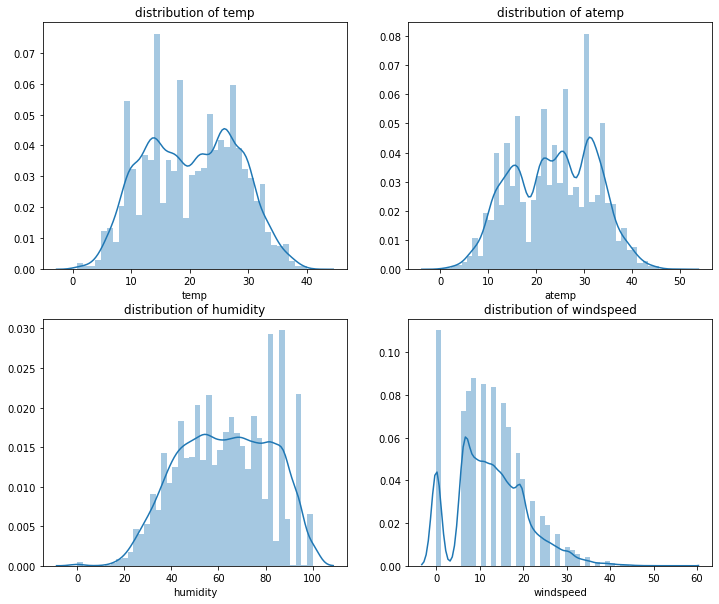

In [125]:
# 先宣告圖表
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)

# displot 是 distribution plot 的縮寫
sns.distplot(data["temp"], ax=axes[0][0])
sns.distplot(data["atemp"], ax=axes[0][1])
sns.distplot(data["humidity"], ax=axes[1][0])
sns.distplot(data["windspeed"], ax=axes[1][1])

axes[0][0].set(xlabel = 'temp', title="distribution of temp")
axes[0][1].set(xlabel = 'atemp', title="distribution of atemp")
axes[1][0].set(xlabel = 'humidity', title="distribution of humidity")
axes[1][1].set(xlabel = 'windspeed', title="distribution of windspeed")

## 重新預測風速的數值
- 如果把這樣的資料放進model裡會使model相當不準確，因為windspeed用了很不好的補值方法
- 那為甚麼windspeed的數值都是0不好呢?如果儀器是因為天氣狀況惡劣所壞掉的，windspeed卻顯示為0，這樣風速的資訊會跟天氣的情況是矛盾的
- 使用RandomForest進行windspeed的預測

In [126]:
# 風速資料分為是0與不是0的
dataWind0 = data[data["windspeed"] == 0]
dataWindNot0 = data[data["windspeed"] != 0]

# 利用 RandomForest 去預測出可能的數值
rfModel_wind = RandomForestRegressor(n_estimators=1000, random_state=42)
windColumns = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])           #用不是0的資料去訓練model

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0.loc[:,"windspeed"] = wind0Values                    # 預測出來的值放到原本是0的位置
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace = True)
data.drop("index",inplace= True, axis = 1)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


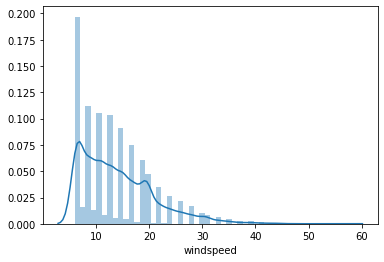

In [127]:
sns.distplot(data["windspeed"])

## 使用log調整腳踏車被租借數量的分佈
- yLabels的分配有點不符合常態分佈，不符合ML的常態分布的假設前提下
- 透過log 調整為趨近常態分布

In [128]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]                  # 最後submit的格式會用到 datetime
yLabels = dataTrain["count"]                        # 每小時腳踏出被租出去的數量到底有多少
yLabelsLog = np.log(yLabels)                        # 對 Y 取 log

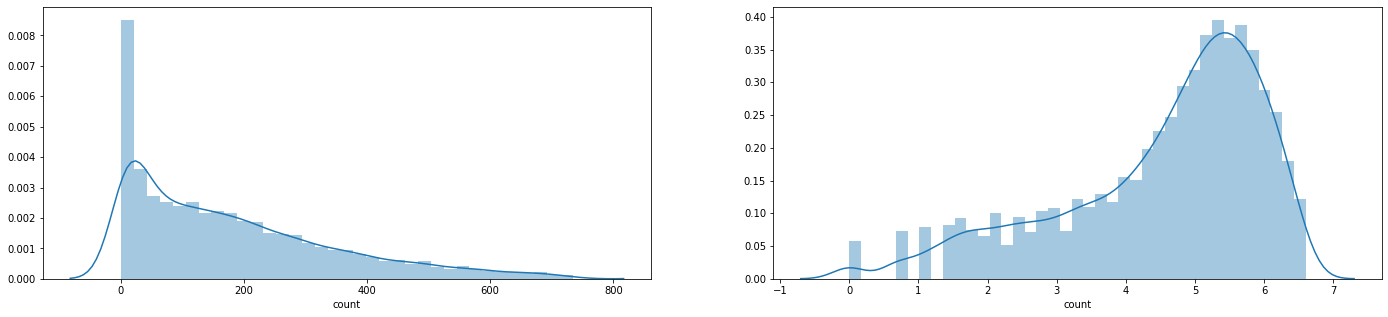

In [129]:
# yLabels 與 yLabels 對應圖
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(24,5)

sns.distplot(yLabels, ax = axes[0])
sns.distplot(yLabelsLog, ax = axes[1])

In [130]:
dropFeatures = ['casual',"count", "datetime", "date", "registered"]
dataTrain = dataTrain.drop(dropFeatures,axis=1)     # train刪除不需要的變數
dataTest = dataTest.drop(dropFeatures, axis=1)      # test刪除不必要的變數

# 訓練模型

In [131]:
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)

# 模型套用在dataTest

In [132]:
predsTest = rfModel.predict(X=dataTest)

# 輸出

In [133]:
submission = pd.DataFrame({
    "datetime":datetimecol,
    "count":[max(0,x) for x in np.exp(predsTest)]     # 將 predsTest取 exp() 還原
})
submission.to_csv('bike_predictions_RF.csv',index= False)